<a id='top'></a>

# Physical  Data Engineering
##### Notebook to engineer physical data data using [pandas](http://pandas.pydata.org/).

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 20/01/2022<br>
Notebook last updated: 01/02/2022

![Watford F.C.](../../img/club_badges/premier_league/watford_fc_logo_small.png)

Click [here](#section4) to jump straight into the Data Engineering section and skip the [Notebook Brief](#section2) and [Data Sources](#section3) sections.

___


## <a id='introduction'>Introduction</a>
This notebook engineers a an anonymised dataset of physical data provided by [Watford F.C](https://www.watfordfc.com/), using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames.

For more information about this notebook and the author, I am available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/); and
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster).

A static version of this notebook can be found [here](https://nbviewer.org/github/eddwebster/watford/blob/main/notebooks/2_data_engineering/Opta%20Data%20Engineering.ipynb). This notebook has an accompanying [`watford`](https://github.com/eddwebster/watford) GitHub repository and for my full repository of football analysis, see my [`football_analysis`](https://github.com/eddwebster/football_analytics) GitHub repository.

___

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Notebook Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Read in the Datasets](#section3.2)<br>
      3.    [Initial Data Handling](#section3.3)<br>
4.    [Data Engineering](#section4)<br>
      1.    [Assign Raw DataFrame to Engineered DataFrame](#section4.1)<br>
5.    [Summary](#section5)<br>
6.    [Next Steps](#section6)<br>
7.    [References](#section7)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing; and
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation.

All packages used for this notebook can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [2]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd
import pandas_profiling as pp
import os
import re
import chardet
import random
from io import BytesIO
from pathlib import Path

# Reading Directories
import glob
import os

# Working with JSON
import json
from pandas import json_normalize

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Requests and downloads
import tqdm
import requests

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Print message
print("Setup Complete")

Setup Complete


In [3]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))

Python: 3.7.6
NumPy: 1.19.1
pandas: 1.1.3
matplotlib: 3.3.1


### Defined Filepaths

In [4]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..')
data_dir = os.path.join(base_dir, 'data')
data_dir_physical = os.path.join(base_dir, 'data', 'physical')
scripts_dir = os.path.join(base_dir, 'scripts')
models_dir = os.path.join(base_dir, 'models')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')

### Notebook Settings

In [5]:
# Display all columns of displayed pandas DataFrames
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

---

<a id='section2'></a>

## <a id='#section2'>2. Notebook Brief</a>
This notebook parses and engineers [Opta data](https://www.statsperform.com/opta/) by [Stats Perform](https://www.statsperform.com/) ... using [pandas](http://pandas.pydata.org/).


**Notebook Conventions**:<br>
*    Variables that refer a `DataFrame` object are prefixed with `df_`.
*    Variables that refer to a collection of `DataFrame` objects (e.g., a list, a set or a dict) are prefixed with `dfs_`.

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>

<a id='section3.1'></a>

### <a id='#section3.1'>3.1. Introduction</a>
The physical data...

<a id='section3.2'></a>

### <a id='#section3.2'>3.2. Import Data</a>
These `CSV` file provided is read in as [pandas](https://pandas.pydata.org/) DataFrames.

In [6]:
# Show files in directory
print(glob.glob(os.path.join(data_dir_physical, 'raw', 'F7/*.csv')))

[]


In [7]:
# Import CSV file as a pandas DataFrame
df_physical_raw = pd.read_csv(os.path.join(data_dir_physical, 'raw', 'Physical Output.csv'))

<a id='section3.3'></a>

### <a id='#section3.3'>3.3. Initial Data Handling</a>
First check the quality of the dataset by looking first and last rows in pandas using the [`head()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [`tail()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [8]:
# Display the first five rows of the DataFrame, df_physical_raw
df_physical_raw.head()

,Match Date,Match,Home/Away,Team,Player Name,Minutes Played,Ball In Play Time,Time In Possession,Time Opponent In Possession,Time In Uncontrolled Possession,Time In Established Possession,Total Distance,Total Low Intensity Distance,Total High Intensity Distance,Stand Distance,Walk Distance,Jog Distance,Run Distance,High Speed Run Distance,High Speed Distance - Player Average,Sprint Distance,Ball In Play Total Distance,In Possession Total Distance,Opponent In Possession Total Distance,Uncontrolled Possession Total Distance,Ball Out Of Play Total Distance,Total Distance (m/min),Total Distance In Possession (m/min),Total Distance Opponent In Possession (m/min),Total Distance Uncontrolled Possession (m/min),Ball In Play HI Distance,In Possession HI Distance,Opponent In Possession HI Distance,Uncontrolled Possession HI Distance,Ball Out Of Play HI Distance,HI Distance (m/min),HI Distance In Possession (m/min),HI Distance Opponent In Possession (m/min),HI Distance Uncontrolled Possession (m/min),Ball In Play Sprint Distance,In Possession Sprint Distance,Opponent In Possession Sprint Distance,Uncontrolled Possession Sprint Distance,Ball Out Of Play Sprint Distance,Sprint Distance (m/min),Sprint Distance In Possession (m/min),Sprint Distance Opponent In Possession (m/min),Sprint Distance Uncontrolled Possession (m/min),HI Events,Sprint Events,HS Run Events,Maximum Speed (km/h),Deceleration Very High Events,Deceleration High Events,Deceleration Medium Events,Deceleration Low Events,Acceleration Low Events,Acceleration Medium Events,Acceleration High Events,Acceleration Very High Events,1-5TD,6-10TD,11-15TD,16-20TD,21-25TD,26-30TD,31-35TD,36-40TD,41-45TD,45+TD,46-50TD,51-55TD,56-60TD,61-65TD,66-70TD,71-75TD,76-80TD,81-85TD,86-90TD,90+TD,1-5HID,6-10HID,11-15HID,16-20HID,21-25HID,26-30HID,31-35HID,36-40HID,41-45HID,45+HID,46-50HID,51-55HID,56-60HID,61-65HID,66-70HID,71-75HID,76-80HID,81-85HID,86-90HID,90+HID
0,11/09/2017,Team A v Team Q,home,Team A,Player 11,97,44.4,21.2,21.1,2.1,7.7,10274.7,9537.4,737.3,55.7,3852.9,3818.9,1809.8,639.4,550.388462,97.9,6499.6,2863.4,3374.8,261.4,3775.1,105.9,135.1,159.9,124.5,705.3,292.0,410.6,2.7,32.0,7.6,13.8,19.5,1.3,88.3,47.4,40.9,0.0,9.7,1.0,2.2,1.9,NaN,40,7,41,29.7,2,19,70,220,236,69,9,0,598.8,542.0,633.3,581.5,605.0,546.2,420.3,486.3,501.1,173.3,600.7,604.2,553.1,393.7,514.5,474.5,475.1,539.8,505.5,525.8,32.5,54.3,57.2,19.5,49.3,31.5,57.1,40.4,35.2,7.7,47.2,81.7,82.6,2.9,13.2,20.2,12.9,32.5,8.0,51.6
1,11/09/2017,Team A v Team Q,home,Team A,Player 23,97,44.4,21.2,21.1,2.1,7.7,9847.5,9317.7,529.8,51.0,3890.7,3742.7,1633.3,420.0,295.738462,109.8,6380.2,2789.5,3306.3,284.4,3467.3,101.5,131.6,156.7,135.4,497.7,100.3,392.2,5.2,32.1,5.5,4.7,18.6,2.5,109.8,9.3,100.5,0.0,0.0,1.1,0.4,4.8,NaN,25,6,26,29.7,2,16,81,279,312,99,16,2,453.7,568.7,675.7,570.0,598.5,560.6,451.5,455.7,508.2,203.8,473.7,548.9,564.4,387.2,434.7,468.7,465.5,578.9,450.1,429.0,13.7,45.0,72.5,36.8,9.7,30.7,23.5,61.9,54.0,15.7,5.1,38.7,25.1,5.9,5.5,0.0,8.0,45.6,13.3,18.9
2,11/09/2017,Team A v Team Q,home,Team A,Player 13,97,44.4,21.2,21.1,2.1,7.7,10587.6,9614.4,973.2,40.1,3771.9,3904.7,1897.7,744.1,752.552941,229.1,7225.3,3196.8,3710.0,318.5,3362.3,109.2,150.8,175.8,151.7,945.4,421.0,515.8,8.6,27.8,10.0,19.9,24.4,4.1,224.9,115.8,109.1,0.0,4.2,2.4,5.5,5.2,NaN,48,12,36,31.9,4,18,72,272,299,75,8,1,562.2,509.0,660.1,579.8,650.2,536.3,511.8,482.3,502.6,175.2,578.5,641.4,592.5,395.1,521.6,499.3,567.0,556.8,541.1,524.8,50.5,36.1,124.5,47.9,38.6,58.7,56.9,42.9,50.2,12.3,47.9,103.6,54.8,12.6,9.2,15.1,33.5,60.8,51.9,65.2
3,11/09/2017,Team A v Team Q,home,Team A,Player 1,97,44.4,21.2,21.1,2.1,7.7,9799.4,8918.8,880.5,42.4,4219.4,3293.4,1363.6,639.7,641.346154,240.8,6423.5,3355.7,2803.4,264.4,3375.9,101.0,158.3,132.9,125.9,861.8,624.8,217.5,19.5,18.7,9.1,29.5,10.3,9.3,240.8,198.0,42.8,0.0,0.0,2.5,9.3,2.0,NaN,46,9,43,37.8,5,13,59,213,203,76,19,0,548.0,479.9,605.1,531.7,608.1,543.5,400.4,518.9,462.1,190.3,564.0,559.9,488.7,301.3,475.0,534.6,517.9,517.4,446.

In [10]:
# Display the last five rows of the DataFrame, df_physical_raw
df_physical_raw.tail()

,Match Date,Match,Home/Away,Team,Player Name,Minutes Played,Ball In Play Time,Time In Possession,Time Opponent In Possession,Time In Uncontrolled Possession,Time In Established Possession,Total Distance,Total Low Intensity Distance,Total High Intensity Distance,Stand Distance,Walk Distance,Jog Distance,Run Distance,High Speed Run Distance,High Speed Distance - Player Average,Sprint Distance,Ball In Play Total Distance,In Possession Total Distance,Opponent In Possession Total Distance,Uncontrolled Possession Total Distance,Ball Out Of Play Total Distance,Total Distance (m/min),Total Distance In Possession (m/min),Total Distance Opponent In Possession (m/min),Total Distance Uncontrolled Possession (m/min),Ball In Play HI Distance,In Possession HI Distance,Opponent In Possession HI Distance,Uncontrolled Possession HI Distance,Ball Out Of Play HI Distance,HI Distance (m/min),HI Distance In Possession (m/min),HI Distance Opponent In Possession (m/min),HI Distance Uncontrolled Possession (m/min),Ball In Play Sprint Distance,In Possession Sprint Distance,Opponent In Possession Sprint Distance,Uncontrolled Possession Sprint Distance,Ball Out Of Play Sprint Distance,Sprint Distance (m/min),Sprint Distance In Possession (m/min),Sprint Distance Opponent In Possession (m/min),Sprint Distance Uncontrolled Possession (m/min),HI Events,Sprint Events,HS Run Events,Maximum Speed (km/h),Deceleration Very High Events,Deceleration High Events,Deceleration Medium Events,Deceleration Low Events,Acceleration Low Events,Acceleration Medium Events,Acceleration High Events,Acceleration Very High Events,1-5TD,6-10TD,11-15TD,16-20TD,21-25TD,26-30TD,31-35TD,36-40TD,41-45TD,45+TD,46-50TD,51-55TD,56-60TD,61-65TD,66-70TD,71-75TD,76-80TD,81-85TD,86-90TD,90+TD,1-5HID,6-10HID,11-15HID,16-20HID,21-25HID,26-30HID,31-35HID,36-40HID,41-45HID,45+HID,46-50HID,51-55HID,56-60HID,61-65HID,66-70HID,71-75HID,76-80HID,81-85HID,86-90HID,90+HID
415,08/05/2018,Team A v Team H,home,Team A,Player 15,28,16.2,8.5,7.4,0.3,5.0,3648.5,3362.5,286.0,8.8,951.3,1529.9,872.5,255.5,589.753125,30.5,2814.6,1335.0,1434.1,45.5,833.9,130.3,157.1,193.8,151.7,286.0,42.3,243.8,0.0,0.0,10.2,5.0,32.9,NaN,30.5,0.0,30.5,0.0,0.0,1.1,NaN,4.1,NaN,15,1,15,29.7,2,3,28,102,101,29,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,682.2,735.4,684.6,559.2,673.9,313.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.5,51.5,62.9,17.5,38.5,83.2
416,08/05/2018,Team A v Team H,home,Team A,Player 27,94,57.9,28.5,28.6,0.8,17.0,10396.2,9207.7,1188.5,35.6,3804.6,3632.7,1734.9,953.8,307.780000,234.7,8073.1,3797.8,4165.2,110.0,2323.2,110.6,133.3,145.6,137.5,1170.2,599.8,558.3,12.1,18.3,12.6,21.0,19.5,15.1,226.5,135.6,90.8,0.0,8.2,2.5,4.8,3.2,NaN,58,14,55,32.2,0,16,88,233,269,89,15,1,619.5,526.6,480.5,549.8,502.0,625.3,390.6,516.5,597.9,112.9,706.2,634.6,604.4,445.3,522.7,692.7,545.1,482.1,629.4,212.0,86.5,37.5,8.8,45.6,28.0,104.6,31.9,69.2,61.4,12.5,115.2,109.3,59.9,47.8,42.2,139.1,42.4,44.9,88.8,12.8
417,08/05/2018,Team A v Team H,home,Team A,Player 3,94,57.9,28.5,28.6,0.8,17.0,9752.5,8885.9,866.6,53.4,3514.1,3884.0,1434.5,657.4,417.075000,209.2,7768.4,3265.2,4365.0,138.2,1984.1,103.8,114.6,152.6,172.7,845.7,108.4,697.7,39.6,20.9,9.2,3.8,24.4,49.5,209.2,27.6,158.2,23.3,0.0,2.2,1.0,5.5,29.1,45,11,37,32.8,4,16,74,245,256,82,21,0,568.7,592.9,552.0,527.8,516.4,623.2,420.1,554.9,548.0,70.2,639.5,575.0,591.6,409.7,450.3,493.2,442.3,441.8,457.0,278.1,38.5,83.7,31.2,82.4,23.6,59.8,10.2,94.8,55.4,10.2,54.8,45.1,80.1,5.6,51.7,22.0,13.5,5.4,35.4,63.2
418,08/05/2018,Team A v Team H,home,Team A,Player 31,65,41.7,19.9,21.3,0.5,12.0,7809.6,7430.5,379.1,19.9,2308.7,3700.3,1401.6,379.1,208.133333,0.0,6385.4,2757.5,3544.9,83.1,1424.1,120.1,138.6,166.4,166.2,375.9,8.2,364.9,2.9,3.2,5.8,0.4,17.1,5.8,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,17,0,17,24.9,0,7,49,193,226,45,2,2,700.3,581.3,590.6,601.4,533.3,599.8,470.8,623.5,603.5,64.6,762.7,611.3,606.0,460.5,0.0,0.0,0.0,0.0,0.0,0.0,26.2,14.2,33.2,39.1,6.5,6.0,17.5,27.3,10.6,0.

In [11]:
# Print the shape of the DataFrame, df_physical_raw
print(df_physical_raw.shape)

(420, 100)


In [12]:
# Print the column names of the DataFrame, df_physical_raw
print(df_physical_raw.columns)

Index(['Match Date', 'Match', 'Home/Away', 'Team', 'Player Name',
       'Minutes Played', 'Ball In Play Time', 'Time In Possession',
       'Time Opponent In Possession', 'Time In Uncontrolled Possession',
       'Time In Established Possession', 'Total Distance',
       'Total Low Intensity Distance', 'Total High Intensity Distance',
       'Stand Distance', 'Walk Distance', 'Jog Distance', 'Run Distance',
       'High Speed Run Distance', 'High Speed Distance - Player Average',
       'Sprint Distance', 'Ball In Play Total Distance',
       'In Possession Total Distance', 'Opponent In Possession Total Distance',
       'Uncontrolled Possession Total Distance',
       'Ball Out Of Play Total Distance', 'Total Distance (m/min)',
       'Total Distance In Possession (m/min)',
       'Total Distance Opponent In Possession (m/min)',
       'Total Distance Uncontrolled Possession (m/min)',
       'Ball In Play HI Distance', 'In Possession HI Distance',
       'Opponent In Possession HI Di

In [13]:
# Data types of the features of the raw DataFrame, df_physical_raw
df_physical_raw.dtypes

Match Date      object
Match           object
Home/Away       object
Team            object
Player Name     object
                ...   
71-75HID       float64
76-80HID       float64
81-85HID       float64
86-90HID       float64
90+HID         float64
Length: 100, dtype: object

Full details of these attributes and their data types is discussed further in the [Data Dictionary](section3.2.2).

In [14]:
# Displays all columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_physical_raw.dtypes)

Match Date                                          object
Match                                               object
Home/Away                                           object
Team                                                object
Player Name                                         object
Minutes Played                                       int64
Ball In Play Time                                  float64
Time In Possession                                 float64
Time Opponent In Possession                        float64
Time In Uncontrolled Possession                    float64
Time In Established Possession                     float64
Total Distance                                     float64
Total Low Intensity Distance                       float64
Total High Intensity Distance                      float64
Stand Distance                                     float64
Walk Distance                                      float64
Jog Distance                                       float

In [16]:
# Info for the raw DataFrame, df_physical_raw
df_physical_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 100 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Match Date                                       420 non-null    object 
 1   Match                                            420 non-null    object 
 2   Home/Away                                        420 non-null    object 
 3   Team                                             420 non-null    object 
 4   Player Name                                      420 non-null    object 
 5   Minutes Played                                   420 non-null    int64  
 6   Ball In Play Time                                420 non-null    float64
 7   Time In Possession                               420 non-null    float64
 8   Time Opponent In Possession                      420 non-null    float64
 9   Time In Uncontrolled Possession

<AxesSubplot:>

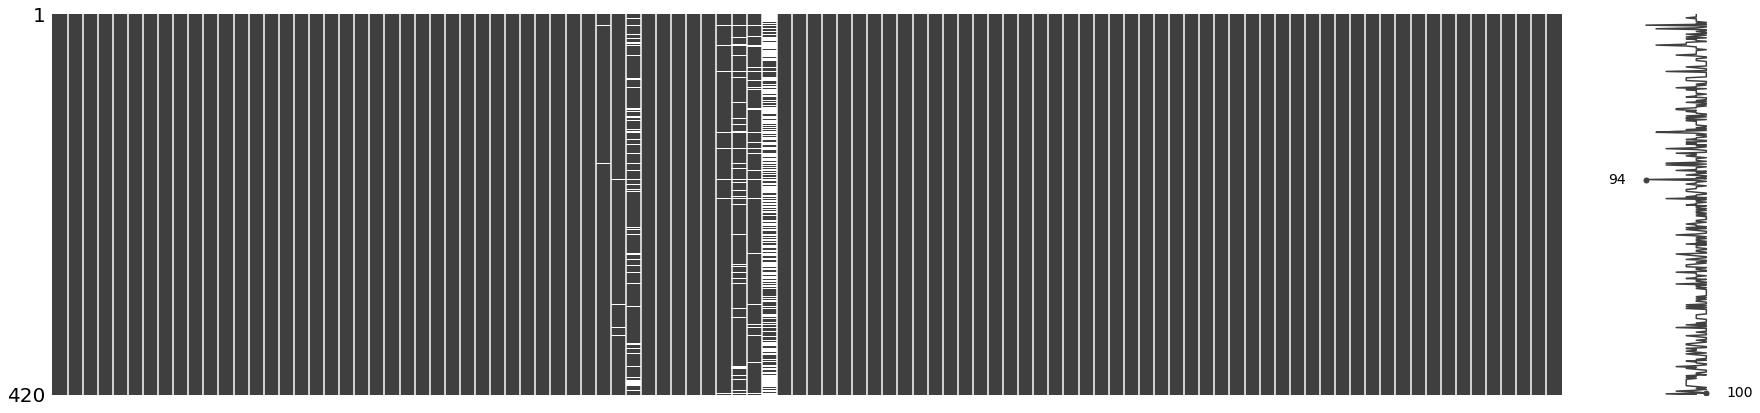

In [17]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_physical_raw
msno.matrix(df_physical_raw, figsize = (30, 7))

In [18]:
# Counts of missing values
null_value_stats = df_physical_raw.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

HI Distance In Possession (m/min)                    2
HI Distance Opponent In Possession (m/min)           4
HI Distance Uncontrolled Possession (m/min)         60
Sprint Distance (m/min)                             10
Sprint Distance In Possession (m/min)               40
Sprint Distance Opponent In Possession (m/min)      26
Sprint Distance Uncontrolled Possession (m/min)    240
dtype: int64

---

<a id='section4'></a>

## <a id='#section4'>4. Data Engineering</a>
The next step is to wrangle the dataset to into a format that’s suitable for analysis.

This section is broken down into the following subsections:

4.1.    [Assign Raw DataFrame to Engineered DataFrame](#section4.1)<br>

<a id='section4.01'></a>

### <a id='#section4.01'>4.1. Assign Raw DataFrames to Engineered DataFrames</a>

In [19]:
# Assign Raw DataFrame to Engineered DataFrame
df_physical = df_physical_raw.copy()

In [20]:
df_physical.head()

,Match Date,Match,Home/Away,Team,Player Name,Minutes Played,Ball In Play Time,Time In Possession,Time Opponent In Possession,Time In Uncontrolled Possession,Time In Established Possession,Total Distance,Total Low Intensity Distance,Total High Intensity Distance,Stand Distance,Walk Distance,Jog Distance,Run Distance,High Speed Run Distance,High Speed Distance - Player Average,Sprint Distance,Ball In Play Total Distance,In Possession Total Distance,Opponent In Possession Total Distance,Uncontrolled Possession Total Distance,Ball Out Of Play Total Distance,Total Distance (m/min),Total Distance In Possession (m/min),Total Distance Opponent In Possession (m/min),Total Distance Uncontrolled Possession (m/min),Ball In Play HI Distance,In Possession HI Distance,Opponent In Possession HI Distance,Uncontrolled Possession HI Distance,Ball Out Of Play HI Distance,HI Distance (m/min),HI Distance In Possession (m/min),HI Distance Opponent In Possession (m/min),HI Distance Uncontrolled Possession (m/min),Ball In Play Sprint Distance,In Possession Sprint Distance,Opponent In Possession Sprint Distance,Uncontrolled Possession Sprint Distance,Ball Out Of Play Sprint Distance,Sprint Distance (m/min),Sprint Distance In Possession (m/min),Sprint Distance Opponent In Possession (m/min),Sprint Distance Uncontrolled Possession (m/min),HI Events,Sprint Events,HS Run Events,Maximum Speed (km/h),Deceleration Very High Events,Deceleration High Events,Deceleration Medium Events,Deceleration Low Events,Acceleration Low Events,Acceleration Medium Events,Acceleration High Events,Acceleration Very High Events,1-5TD,6-10TD,11-15TD,16-20TD,21-25TD,26-30TD,31-35TD,36-40TD,41-45TD,45+TD,46-50TD,51-55TD,56-60TD,61-65TD,66-70TD,71-75TD,76-80TD,81-85TD,86-90TD,90+TD,1-5HID,6-10HID,11-15HID,16-20HID,21-25HID,26-30HID,31-35HID,36-40HID,41-45HID,45+HID,46-50HID,51-55HID,56-60HID,61-65HID,66-70HID,71-75HID,76-80HID,81-85HID,86-90HID,90+HID
0,11/09/2017,Team A v Team Q,home,Team A,Player 11,97,44.4,21.2,21.1,2.1,7.7,10274.7,9537.4,737.3,55.7,3852.9,3818.9,1809.8,639.4,550.388462,97.9,6499.6,2863.4,3374.8,261.4,3775.1,105.9,135.1,159.9,124.5,705.3,292.0,410.6,2.7,32.0,7.6,13.8,19.5,1.3,88.3,47.4,40.9,0.0,9.7,1.0,2.2,1.9,NaN,40,7,41,29.7,2,19,70,220,236,69,9,0,598.8,542.0,633.3,581.5,605.0,546.2,420.3,486.3,501.1,173.3,600.7,604.2,553.1,393.7,514.5,474.5,475.1,539.8,505.5,525.8,32.5,54.3,57.2,19.5,49.3,31.5,57.1,40.4,35.2,7.7,47.2,81.7,82.6,2.9,13.2,20.2,12.9,32.5,8.0,51.6
1,11/09/2017,Team A v Team Q,home,Team A,Player 23,97,44.4,21.2,21.1,2.1,7.7,9847.5,9317.7,529.8,51.0,3890.7,3742.7,1633.3,420.0,295.738462,109.8,6380.2,2789.5,3306.3,284.4,3467.3,101.5,131.6,156.7,135.4,497.7,100.3,392.2,5.2,32.1,5.5,4.7,18.6,2.5,109.8,9.3,100.5,0.0,0.0,1.1,0.4,4.8,NaN,25,6,26,29.7,2,16,81,279,312,99,16,2,453.7,568.7,675.7,570.0,598.5,560.6,451.5,455.7,508.2,203.8,473.7,548.9,564.4,387.2,434.7,468.7,465.5,578.9,450.1,429.0,13.7,45.0,72.5,36.8,9.7,30.7,23.5,61.9,54.0,15.7,5.1,38.7,25.1,5.9,5.5,0.0,8.0,45.6,13.3,18.9
2,11/09/2017,Team A v Team Q,home,Team A,Player 13,97,44.4,21.2,21.1,2.1,7.7,10587.6,9614.4,973.2,40.1,3771.9,3904.7,1897.7,744.1,752.552941,229.1,7225.3,3196.8,3710.0,318.5,3362.3,109.2,150.8,175.8,151.7,945.4,421.0,515.8,8.6,27.8,10.0,19.9,24.4,4.1,224.9,115.8,109.1,0.0,4.2,2.4,5.5,5.2,NaN,48,12,36,31.9,4,18,72,272,299,75,8,1,562.2,509.0,660.1,579.8,650.2,536.3,511.8,482.3,502.6,175.2,578.5,641.4,592.5,395.1,521.6,499.3,567.0,556.8,541.1,524.8,50.5,36.1,124.5,47.9,38.6,58.7,56.9,42.9,50.2,12.3,47.9,103.6,54.8,12.6,9.2,15.1,33.5,60.8,51.9,65.2
3,11/09/2017,Team A v Team Q,home,Team A,Player 1,97,44.4,21.2,21.1,2.1,7.7,9799.4,8918.8,880.5,42.4,4219.4,3293.4,1363.6,639.7,641.346154,240.8,6423.5,3355.7,2803.4,264.4,3375.9,101.0,158.3,132.9,125.9,861.8,624.8,217.5,19.5,18.7,9.1,29.5,10.3,9.3,240.8,198.0,42.8,0.0,0.0,2.5,9.3,2.0,NaN,46,9,43,37.8,5,13,59,213,203,76,19,0,548.0,479.9,605.1,531.7,608.1,543.5,400.4,518.9,462.1,190.3,564.0,559.9,488.7,301.3,475.0,534.6,517.9,517.4,446.

<a id='section4.2'></a>

### <a id='#section4.2'>4.2. Create Columns for 'Non-High Intensity Distance' per 5 mins</a>

In [42]:
# Rewrite with a loop
df_physical['1-5NHID'] = df_physical['1-5TD'] - df_physical['1-5HID']
df_physical['6-10NHID'] = df_physical['6-10TD'] - df_physical['6-10HID']
df_physical['11-15NHID'] = df_physical['11-15TD'] - df_physical['11-15HID']
df_physical['16-20NHID'] = df_physical['16-20TD'] - df_physical['16-20HID']
df_physical['21-25NHID'] = df_physical['21-25TD'] - df_physical['21-25HID']
df_physical['26-30NHID'] = df_physical['26-30TD'] - df_physical['26-30HID']
df_physical['31-35NHID'] = df_physical['31-35TD'] - df_physical['31-35HID']
df_physical['36-40NHID'] = df_physical['36-40TD'] - df_physical['36-40HID']
df_physical['41-45NHID'] = df_physical['41-45TD'] - df_physical['41-45HID']
df_physical['45+NHID'] = df_physical['45+TD'] - df_physical['45+HID']
df_physical['46-50NHID'] = df_physical['46-50TD'] - df_physical['46-50HID']
df_physical['51-55NHID'] = df_physical['51-55TD'] - df_physical['51-55HID']
df_physical['56-60NHID'] = df_physical['56-60TD'] - df_physical['56-60HID']
df_physical['61-65NHID'] = df_physical['61-65TD'] - df_physical['61-65HID']
df_physical['66-70NHID'] = df_physical['66-70TD'] - df_physical['66-70HID']
df_physical['71-75NHID'] = df_physical['71-75TD'] - df_physical['71-75HID']
df_physical['76-80NHID'] = df_physical['76-80TD'] - df_physical['76-80HID']
df_physical['81-85NHID'] = df_physical['81-85TD'] - df_physical['81-85HID']
df_physical['86-90NHID'] = df_physical['86-90TD'] - df_physical['86-90HID']
df_physical['90+NHID'] = df_physical['90+TD'] - df_physical['90+HID']

<a id='section4.3'></a>

### <a id='#section4.3'>4.3. Pivot Data</a>

In [43]:
# Select columns of interest

## Define the columns as a list
lst_cols = ['Match Date',
            'Match',
            'Home/Away',
            'Team',
            'Player Name',
            'Minutes Played',
            '1-5TD',
            '6-10TD',
            '11-15TD',
            '16-20TD',
            '21-25TD',
            '26-30TD',
            '31-35TD',
            '36-40TD',
            '41-45TD',
            '45+TD',
            '46-50TD',
            '51-55TD',
            '56-60TD',
            '61-65TD',
            '66-70TD',
            '71-75TD',
            '76-80TD',
            '81-85TD',
            '86-90TD',
            '90+TD',
            '1-5HID',
            '6-10HID',
            '11-15HID',
            '16-20HID',
            '21-25HID',
            '26-30HID',
            '31-35HID',
            '36-40HID',
            '41-45HID',
            '45+HID',
            '46-50HID',
            '51-55HID',
            '56-60HID',
            '61-65HID',
            '66-70HID',
            '71-75HID',
            '76-80HID',
            '81-85HID',
            '86-90HID',
            '90+HID',
            '1-5NHID',
            '6-10NHID',
            '11-15NHID',
            '16-20NHID',
            '21-25NHID',
            '26-30NHID',
            '31-35NHID',
            '36-40NHID',
            '41-45NHID',
            '45+NHID',
            '46-50NHID',
            '51-55NHID',
            '56-60NHID',
            '61-65NHID',
            '66-70NHID',
            '71-75NHID',
            '76-80NHID',
            '81-85NHID',
            '86-90NHID',
            '90+NHID'
           ]   

## Filter DataFrame for just the columns of interest
df_physical_select = df_physical[lst_cols]

In [44]:
# Pivot the DataFrame
df_physical_pvt = pd.melt(df_physical_select, id_vars=['Match Date',
                                                       'Match',
                                                       'Home/Away',
                                                       'Team',
                                                       'Player Name',
                                                       'Minutes Played'
                                                      ], var_name='Time Period'
                                                       , value_name='Total Distance'
                         )

In [45]:
# Display DataFrame
df_physical_pvt.head()

,Match Date,Match,Home/Away,Team,Player Name,Minutes Played,Time Period,Total Distance
0,11/09/2017,Team A v Team Q,home,Team A,Player 11,97,1-5TD,598.8
1,11/09/2017,Team A v Team Q,home,Team A,Player 23,97,1-5TD,453.7
2,11/09/2017,Team A v Team Q,home,Team A,Player 13,97,1-5TD,562.2
3,11/09/2017,Team A v Team Q,home,Team A,Player 1,97,1-5TD,548.0
4,11/09/2017,Team A v Team Q,home,Team A,Player 14,67,1-5TD,546.2


In [37]:
# DataFrame shape
df_physical_pvt.shape

(16800, 8)

<a id='section4.4'></a>

### <a id='#section4.4'>4.4. ...</a>

---

<a id='section5'></a>

## <a id='#section5'>5. Export Final DataFrames</a>

In [46]:
# Export DataFrames
#df_physical.to_csv(os.path.join(data_dir_physical, 'engineered', 'Physical Output.csv'), index=None, header=True)
#df_physical_pvt.to_csv(os.path.join(data_dir_physical, 'engineered', 'Physical Output Pivoted.csv'), index=None, header=True)

---

<a id='section6'></a>

## <a id='#section6'>6. Summary</a>
This notebook engineer physical data using [pandas](http://pandas.pydata.org/).

---

<a id='section7'></a>

## <a id='#section7'>7. Next Steps</a>
The next stage is to visualise this data in Tableau and analyse the findings, to be presented in a deck.

---

<a id='section8'></a>

## <a id='#section8'>8. References</a>
*    ...
*    ...
*    ...

---

***Visit my website [eddwebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)